2000it [00:00, 14259.19it/s]


output_v1_credit_train/rl4rs/agents/sid_SIDPolicy_credit_actor0.001_critic0.001_entropy0.1_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7/model.report
episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss
19240.0	12.308490614227901	31.750187412200408	15.64444351196289	1.6835909016084987	13.084105952686032	16.0	3.880794701986755	0.0	0.0
###########################################################


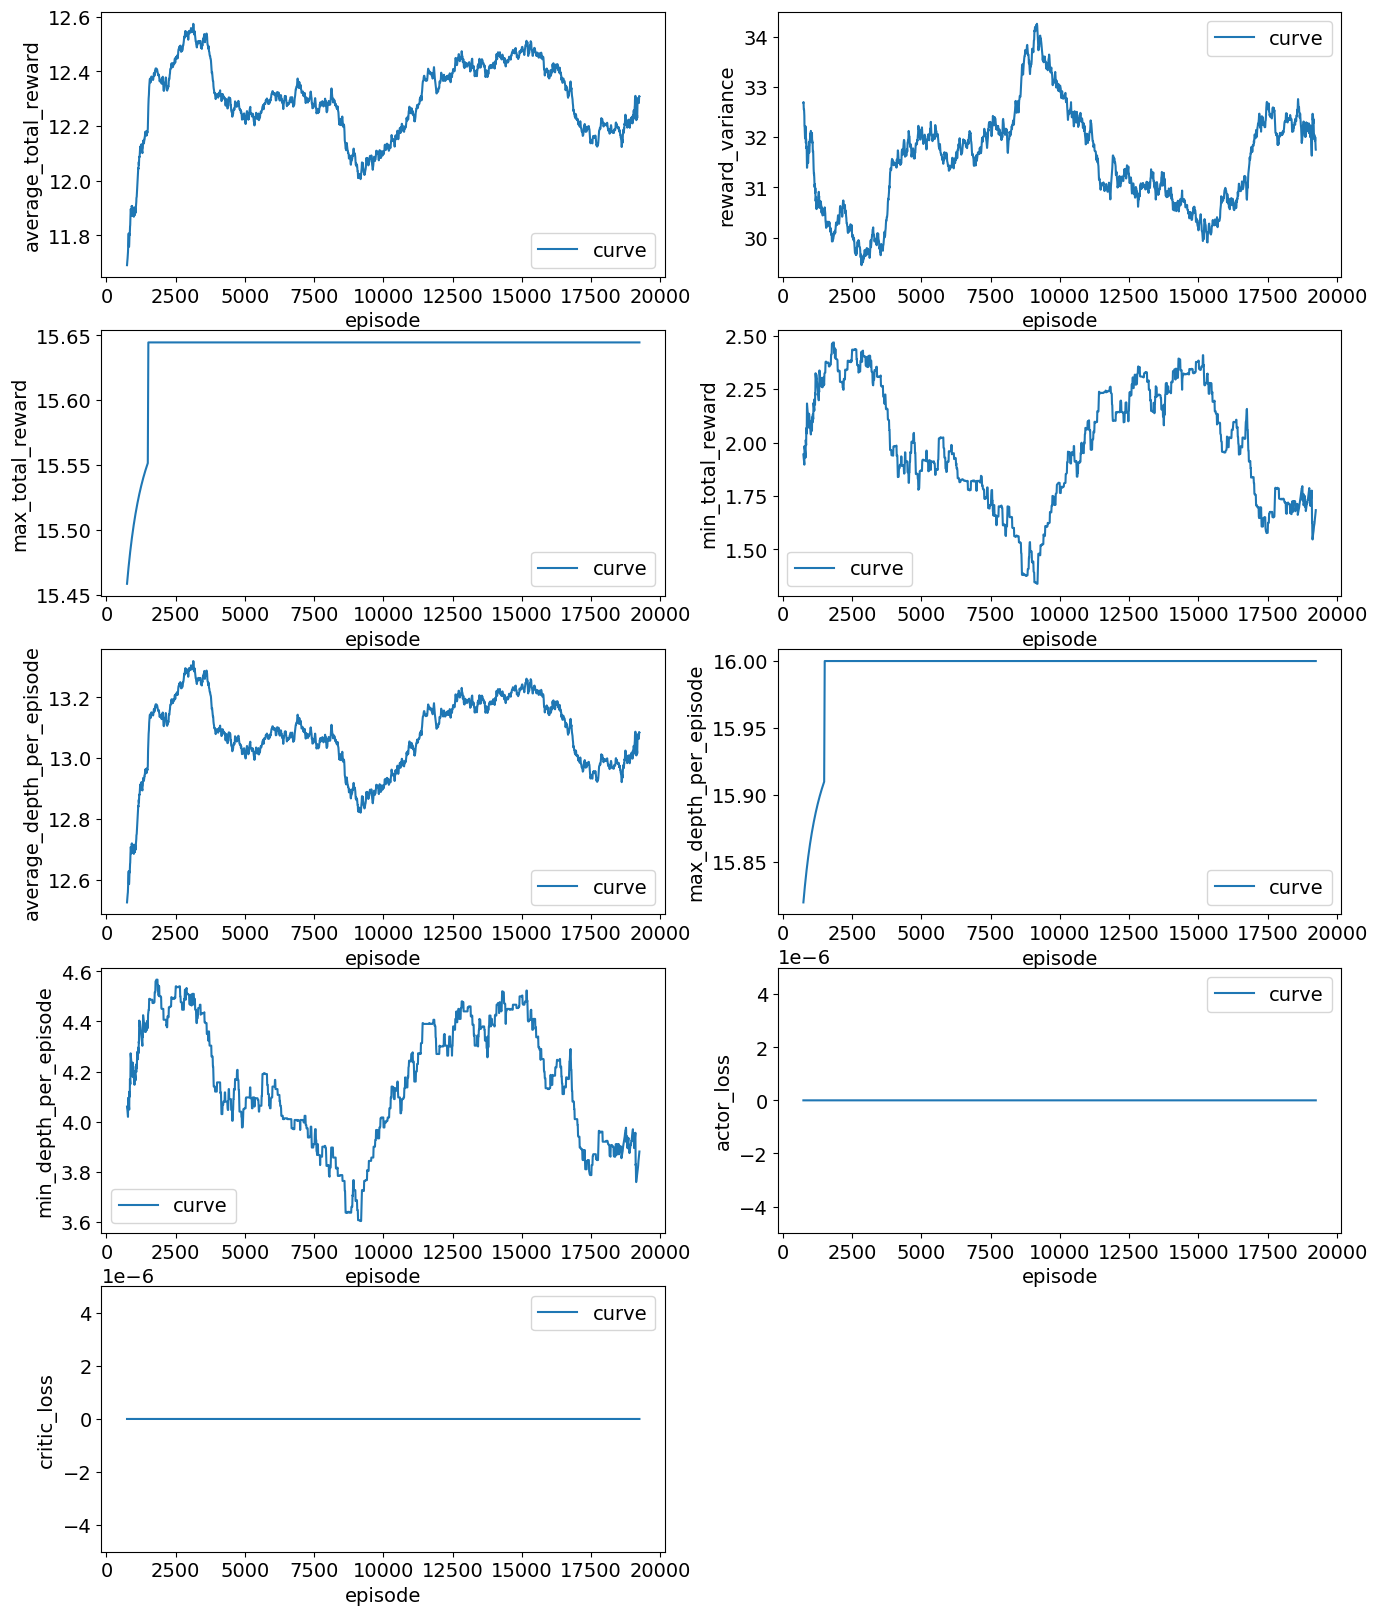

5010it [00:00, 13577.76it/s]


output_v1_credit_train/rl4rs/agents/sid_SIDPolicy_credit_actor0.001_critic0.001_entropy0.2_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7/model.report
episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss
49340.0	10.874620573410136	32.40160788447652	15.519351567653631	0.8660780558522964	11.837748322265828	15.894039735099337	3.052980132450331	-0.18790248401759083	0.039225347603776106
###########################################################


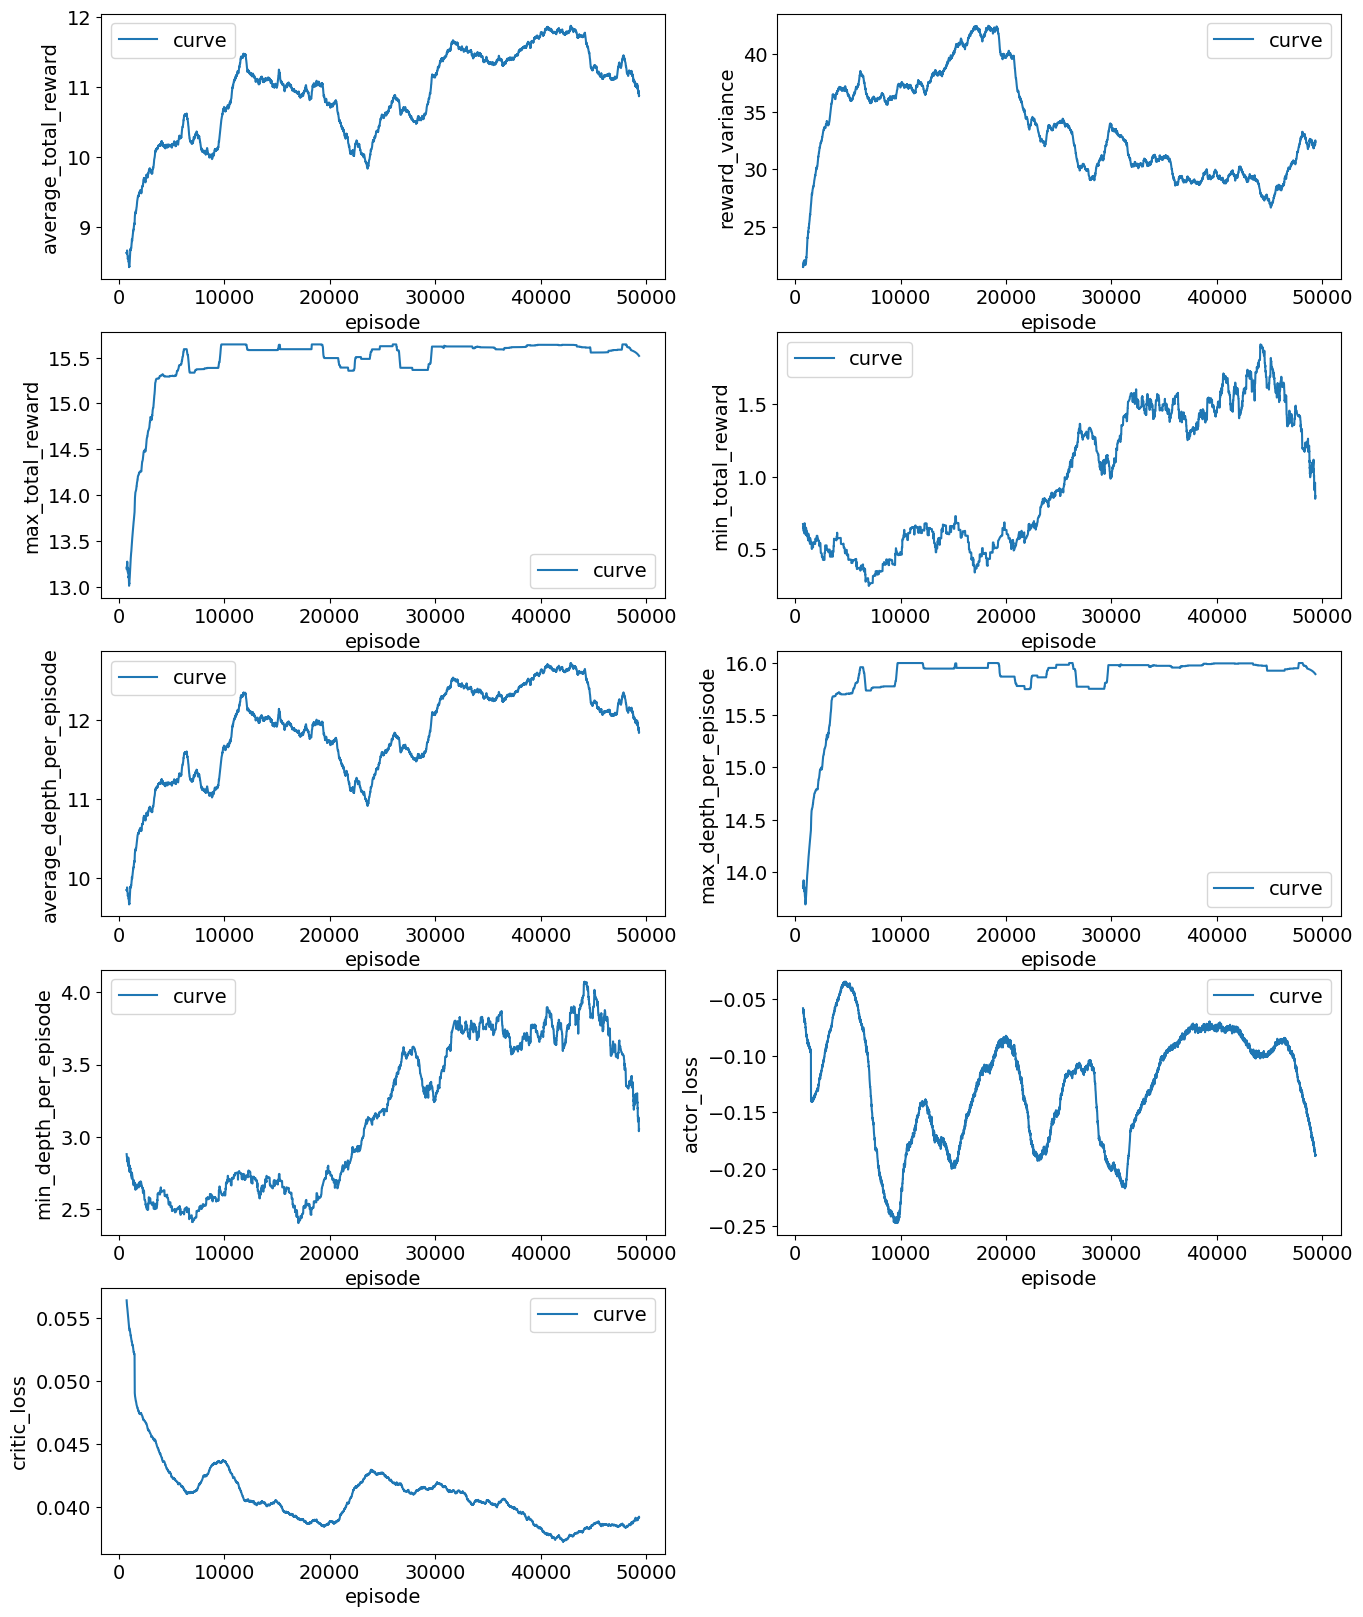

over


In [ ]:
%matplotlib inline
from plot_utils import get_training_info, get_rl_training_info, plot_multiple_line, smooth
import numpy as np

smoothness = 300
import os

## entrophy
directory_path = "output_v1_credit_train/rl4rs/agents"

for x in [0.1,0.2]:
    i = f"sid_SIDPolicy_credit_actor0.001_critic0.001_entropy{x}_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7"

    path = directory_path + '/' + i+'/model.report'
    if not os.path.exists(path):
        path = directory_path + '/' + i+'/model_train.report'
    if not os.path.exists(path):
        continue
    info = get_rl_training_info(path, ['actor_loss', 'critic_loss'])
    
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v), smoothness)
    print(path)
    print('\t'.join([k for k,v in info.items()]))
    print('\t'.join([str(v[-1]) for k,v in info.items()]))
    print('###########################################################')
    plot_multiple_line(["curve"], [info], x_name = 'episode')

print('over')